### [산점도 그래프]
- 두 개의 컬럼(변수)의 관계를 시각화해서 표현
- 연속형(수치형) 데이터에 사용함

In [1]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# [2] 데이터 준비
F_DATA = r'auto_mpg.csv'

In [3]:
# [3] CSV => DataFrame으로 저장
dataDF = pd.read_csv(F_DATA)

In [4]:
# - 컬럼별 타입 확인
dataDF.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [5]:
dataDF.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


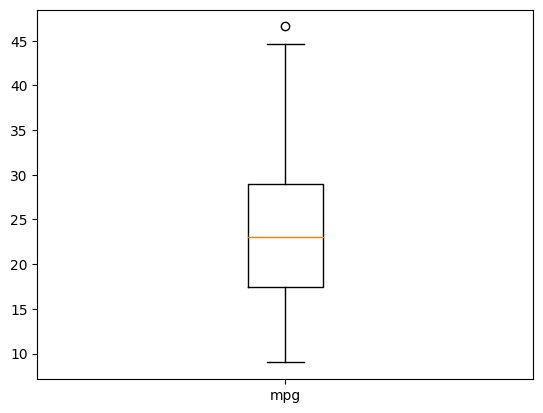

In [9]:
# [4] 컬럼별로 이상한 값 즉, 이상치 체크 및 시각화
retDict = plt.boxplot(dataDF['mpg'], labels=['mpg'])
plt.show()

In [35]:
retDict['fliers'][0].get_data()

(array([1.]), array([46.6]))

In [41]:
retDict['caps'][0].get_data()[1].tolist(), retDict['caps'][1].get_data()[1].tolist()

([9.0, 9.0], [44.6, 44.6])

In [42]:
# 하위/상위 이상치 값 추출
lower = retDict['caps'][0].get_data()[1].tolist()[0]
upper = retDict['caps'][1].get_data()[1].tolist()[0]
lower, upper

(9.0, 44.6)

In [43]:
dataDF[dataDF['mpg'] < lower]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name


In [44]:
dataDF[dataDF['mpg'] > upper]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
322,46.6,4,86.0,65,2110,17.9,80,3,mazda glc


In [18]:
# 박스 그래프에서 받은 결과 확인
for k, v in retDict.items():
    print(k)
    for _ in v:
        print(_.get_data())

whiskers
(array([1, 1]), array([17.5,  9. ]))
(array([1, 1]), array([29. , 44.6]))
caps
(array([0.9625, 1.0375]), array([9., 9.]))
(array([0.9625, 1.0375]), array([44.6, 44.6]))
boxes
(array([0.925, 1.075, 1.075, 0.925, 0.925]), array([17.5, 17.5, 29. , 29. , 17.5]))
medians
(array([0.925, 1.075]), array([23., 23.]))
fliers
(array([1.]), array([46.6]))
means
